In [1]:
import keras
from keras import layers

In [81]:
input_img = keras.Input(shape=(28, 28, 1))

#Encoder Network
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
##
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#Decoder Network
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 7, 7, 8)           584

In [37]:
from keras.datasets import mnist
import numpy as np

In [45]:
from keras.callbacks import TensorBoard
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 65s 140ms/step - loss: 0.1046 - val_loss: 0.1032
Epoch 2/50
469/469 [==============================] - 66s 140ms/step - loss: 0.1035 - val_loss: 0.1018
Epoch 3/50
469/469 [==============================] - 66s 140ms/step - loss: 0.1026 - val_loss: 0.1011
Epoch 4/50
469/469 [==============================] - 66s 140ms/step - loss: 0.1019 - val_loss: 0.1002
Epoch 5/50
469/469 [==============================] - 65s 140ms/step - loss: 0.1013 - val_loss: 0.1000
Epoch 6/50
469/469 [==============================] - 66s 140ms/step - loss: 0.1007 - val_loss: 0.0993
Epoch 7/50
469/469 [==============================] - 65s 138ms/step - loss: 0.1003 - val_loss: 0.0992
Epoch 8/50
469/469 [==============================] - 65s 138ms/step - loss: 0.0999 - val_loss: 0.0987
Epoch 9/50
469/469 [==============================] - 65s 138ms/step - loss: 0.0995 - val_loss: 0.0983
Epoch 10/50
469/469 [==============================] - 67s 143ms/step - l

In [46]:
decoded_imgs = autoencoder.predict(x_test)

In [48]:
import matplotlib.pyplot as plt

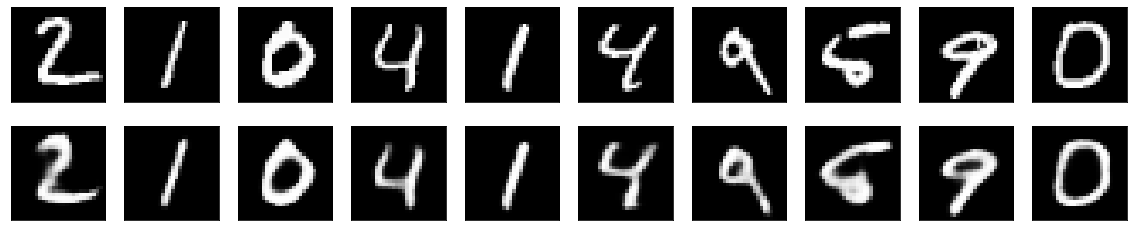

In [49]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [50]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

print (encoded_imgs.shape)

(10000, 4, 4, 8)


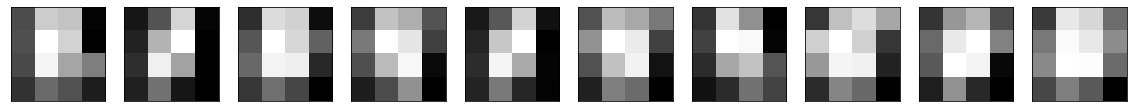

In [52]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i,:,:,4].reshape((4 , 4)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

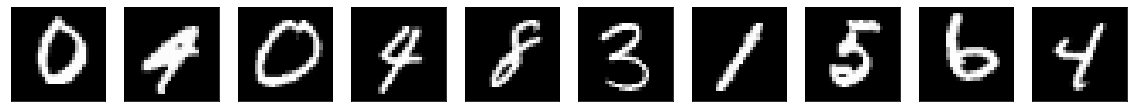

In [53]:
import random
k=10
test_sample=random.sample(list(x_test),k)
plt.figure(figsize=(20, 4))
for i in range(1, k + 1):
    # Display original
    ax = plt.subplot(2, k, i)
    plt.imshow(test_sample[i-1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [135]:

print(encoder.output.shape)

(None, 4, 4, 8)


In [132]:
encoder.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 8)           584

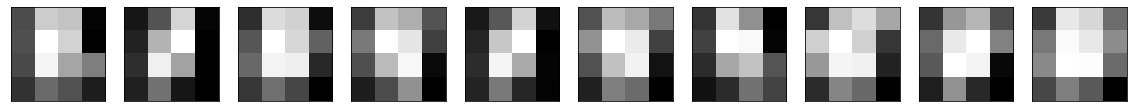

In [131]:
sample_encoded_imgs=encoder.predict(np.array(test_sample))
plt.figure(figsize=(20, 8))
for i in range(1, k + 1):
    ax = plt.subplot(1, k, i)
    plt.imshow(encoded_imgs[i,:,:,4].reshape((4 , 4)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [138]:
encoded_input = keras.Input(shape=(4,4,8))
# print(encoded_input.shape)
#create Decoder model
Decoder=keras.Model(encoded_input,decoded)
Decoder.predict(sample_encoded_imgs)
Decoder.summary()

ValueError: ignored